<a href="https://colab.research.google.com/github/jlb719ru/gisclass/blob/main/final_ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###"Exploring the Interplay of Racial Demographics, Poverty, and Crime Rates: A County-Level Analysis in New Jersey with a Focus on the African-American Population"


**Plan**:
The foundation of my research is rooted in an examination of criminal data and statistics, with a specific emphasis on the intersection of racial demographics, poverty rates, and crime rates. Studying criminal behavior plays a vital role in enhancing societal comprehension, management, and mitigation of crime. It also facilitates the identification and analysis of its root causes, offering valuable insights for the development of effective crime reduction strategies and initiatives.

The primary focus in this case is the African-American population and poverty. In my preceding study, a correlation was identified among these variables at a nationwide level. However, this research will refine its focus to the state level, specifically within the state of New Jersey. The analysis will utilize datasets obtained at the county level for a more localized examination. The scope of analysis involves larceny rates across various counties in New Jersey. Through the subsequent maps and visualizations, I aim to explore the potential correlation between poverty, wages, and crime rates within the African American community of New Jersey.

**Resources**:
The crime data incorporated in this study were drawn from the New Jersey State Police Uniform Crime Report, while the racial percentage data was obtained from the United States Census. Additionally, the poverty data for New Jersey was retrieved from Index Mundi, and the average weekly wage data for the state was procured from the U.S. Bureau of Labor Statistics.

Shapefile: https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download


In [14]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


!pip install mapclassify
import mapclassify #need for thematic map classification

In [15]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC=gpd.read_file('nj_counties.shp')

In [16]:
#Overall race distribution data of NJ by county
overall_race = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njoverallraces.xlsx")

### Distribution of Races In the State of New Jersey:

<Figure size 800x800 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Races in NJ')

([<matplotlib.patches.Wedge at 0x7c9e8c508820>,
 [Text(0.9979554325018838, -0.4626931539800199, 'White '),
  Text(-1.2679262041698403, -0.2869897921171777, 'Black'),
  Text(-1.0482877154427124, 0.3333059640208966, 'Am.Ind.&Al'),
  Text(-0.8304967288785353, 0.7213010351594213, 'Asian'),
  Text(-0.520162626735042, 0.969242406082246, 'Nat.Haw.&Pac.'),
  Text(-0.26480302695025204, 1.067651327408899, 'Other ')],
 [Text(0.5443393268192093, -0.2523780839891017, '63.8%'),
  Text(-0.7802622794891323, -0.1766091028413401, '15.3%'),
  Text(-0.5717932993323884, 0.1818032531023072, '1.6%'),
  Text(-0.4529982157519283, 0.39343692826877524, '11.4%'),
  Text(-0.2837250691282047, 0.5286776760448614, '0.2%'),
  Text(-0.14443801470013748, 0.5823552694957631, '7.7%')])

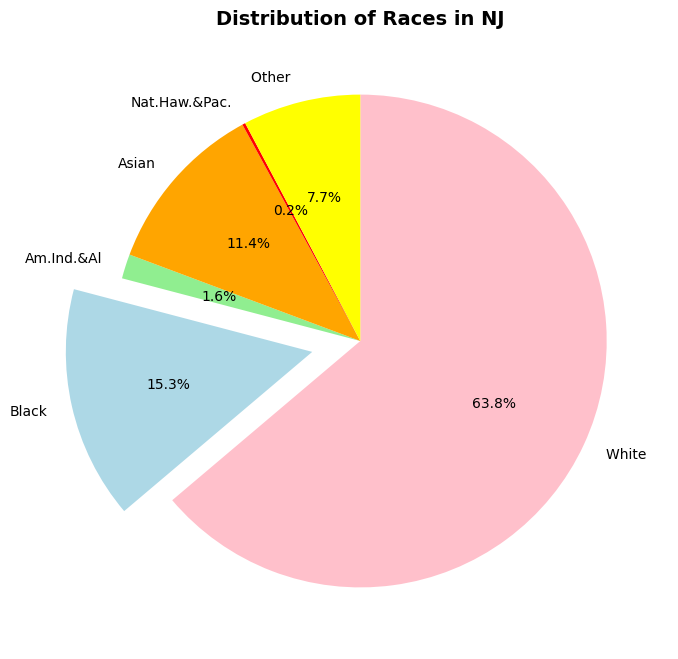

In [17]:
races = overall_race['Race']
percentages = overall_race['Percentage']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.title('Distribution of Races in NJ', size=14, weight='bold')

# Adjust the colors as needed
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'red', 'yellow']
exp = [0,0.2,0,0,0,0]

plt.pie(percentages, labels=races, autopct='%.1f%%', explode=exp, colors=colors, startangle=90, counterclock=False)
plt.show()

Observation: The information depicted in the pie chart presented above has been sourced from the United States Census. The visual representation illustrates a substantial demographic composition in New Jersey, with a predominant representation of the white race, followed by the black population and several other minority ethnicities.

As my study progresses, particular emphasis will be placed on the examination of the black community. According to data released by the United States Census, the official poverty rate among the black population reached a historically low level in 2022, significantly decreasing from pre-pandemic levels.

(External research source: Poverty Rate for the Black Population Fell Below Pre-Pandemic Levels https://www.census.gov/library/stories/2023/09/black-poverty-rate.html)

In [18]:
larceny = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njccountylarceny.xlsx")
race = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njracedata.xlsx")
poverty = pd.read_excel("https://github.com/jlb719ru/gisclass/raw/main/njpovertycounty.xlsx")


In [19]:
njcrime = larceny.merge(race, on='County').merge(poverty, on='County')
njcrime['County'] = njcrime['County'].str.upper()
#njcrime

In [20]:
#Overall data merge
njmap = pd.merge(njC,njcrime, left_on='COUNTY', right_on='County', indicator=True,how='outer')
njmap.rename(columns={'Race %': 'Afr.Am. Pop %'}, inplace=True)
#njmap

### A Comparison: Larceny & African-American Population

The following map will compare crime rates with the percentage of the African-American population. In this illustration, specific attention is directed towards the incidence of larceny. Larceny is defined as a form of theft that involves the unlawful taking of tangible property, including items such as automobiles, jewelry, computers, etc.

<Axes: >

<Axes: >

Text(0.5, 1.0, 'NJ Larceny Rate by County per 100k')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'NJ African-American Race % by County')

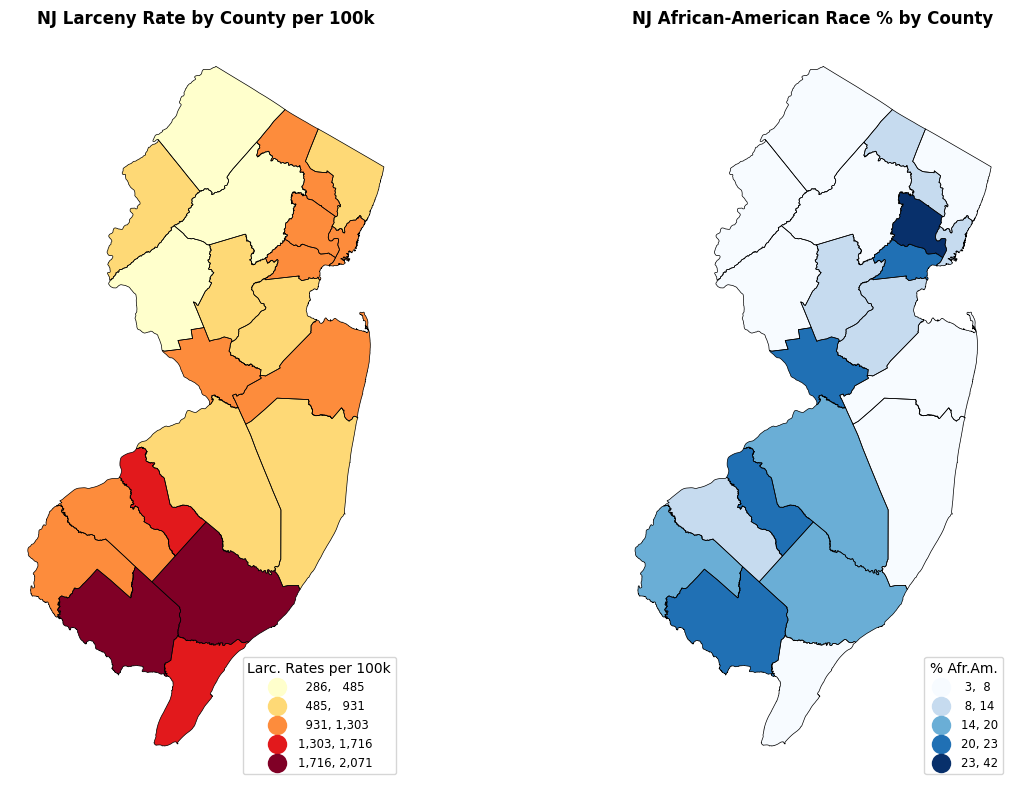

In [32]:
# Create a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Larceny Map
njmap.boundary.plot(ax=ax1, edgecolor='black', linewidth=0.5)
njmap.plot(ax=ax1, column='Larceny Rate per 100k', legend=True, cmap='YlOrRd', scheme='natural_breaks', k=5,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4, 'title': 'Larc. Rates per 100k'})

ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax1.spines[edge].set_visible(False)

ax1.set_title('NJ Larceny Rate by County per 100k', size=12, weight='bold')

# Race Map
njmap.boundary.plot(ax=ax2, edgecolor='black', linewidth=0.5)
njmap.plot(ax=ax2, column='Afr.Am. Pop %', legend=True, cmap='Blues', scheme='natural_breaks', k=5,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'title_fontsize': 'medium',
                       'fontsize': 'small', 'markerscale': 1.4, 'title': '% Afr.Am.'})

ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax2.spines[edge].set_visible(False)

ax2.set_title('NJ African-American Race % by County', size=12, weight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


Observation: According to the mapped data, a discernible correlation exists between larceny crime rates and the African-American community. A recurrent pattern observed in the visualization is the prevalence of higher larceny crime rates in counties characterized by a larger African-American population.

Southern counties in New Jersey exhibit the highest crime rates, concurrently housing the majority of the African-American population. An interesting observation is Essex County, a northern county which possesses the highest African-American percentage among NJ counties. Despite this, Essex County experiences comparatively lower larceny crime rates than the other southern counties that also have higher African-American population percentages. While the incidence of crime is diminished, it still aligns with the higher end of the overall crime rate spectrum.

In [22]:
#Importing to make heatmap
import seaborn as sns

In [23]:
#Poverty by County data for heat map
pov_per = njmap[['COUNTY','Poverty %']]

In [24]:
#Adding centroids
newmap = njmap.copy()

newmap["geometry"] = newmap["geometry"].centroid

### Poverty: By County & In Relation To the African-American Population

The following illustrates poverty from two distinct viewpoints: poverty at the county level and its correlation with the African-American population. As stated by the U.S. Department of Justice Office of Justice Programs, poverty serves as a contributing factor to theft, alongside poor education, low income, and unemployment. The visualizations below aim to convey any potential influence that poverty may exert.

(External research source: Social and Economic Aspects of Theft https://www.ojp.gov/ncjrs/virtual-library/abstracts/social-and-economic-aspects-theft#:~:text=Poor%20education%20appears%20to%20be,greater%20among%20the%20property%20offenders)

In [25]:
#Poverty heat map
pov_per = pov_per.sort_values(by='Poverty %', ascending=False)[:51]
styled_pov = pov_per.style.background_gradient(cmap='YlOrRd')
styled_pov


,COUNTY,Poverty %
5,CUMBERLAND,15.200000
6,ESSEX,14.900000
8,HUDSON,14.300000
13,PASSAIC,13.600000
3,CAMDEN,12.900000
0,ATLANTIC,12.800000
14,SALEM,11.200000
10,MERCER,10.900000
4,CAPE MAY,10.300000
12,OCEAN,9.700000


Observation: According to the U.S. Department of Agriculture, high poverty is defined as exceeding 20%. Fortunately, none of New Jersey's counties have reached that threshold. Nonetheless, some counties are steadily approaching it. The top five counties with the highest poverty rates are Cumberland County, Essex County, Hudson County, Passaic County, and Camden County, ranging from 12.9% to 15.2%.

<Axes: >

<Axes: >

[]

[]

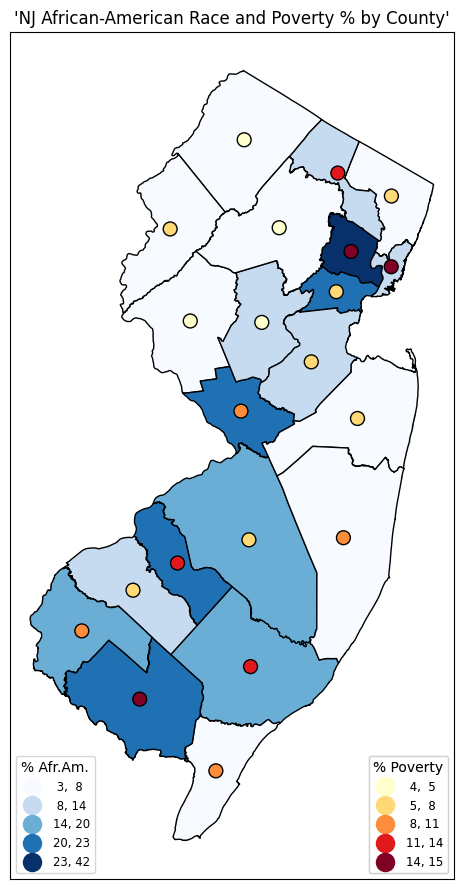

In [26]:
#NJ map w/ centroids
fig, ax = plt.subplots(1, figsize=(15,11))
njmap.plot(ax=ax,column='Afr.Am. Pop %',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''% Afr.Am.''')

newmap.plot(ax=ax,column='Poverty %',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,      #centroids are in newmap
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 100) #

ax.title.set_text("'NJ African-American Race and Poverty % by County'")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''% Poverty''')



ax.add_artist(l2)
ax.add_artist(l1)

Observation: As depicted in the map, a clear relationship exists between counties with a dense African-American population and those experiencing higher levels of poverty. The top five counties with the highest African-American population percentages are Essex County, Union County, Camden County, Cumberland County, and Mercer County, ranging from 21.6% to 42.2%. Based on the data, three counties emerge in both the top five for the highest poverty percentage and the top five for the highest African-American population percentage: Cumberland County, Essex County, and Camden County. Notably, Essex County not only has the highest African-American population percentage, but also ranks second in terms of the highest poverty rate among the counties.

In [27]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

### Final Observations: The Overall Comparison

In [29]:
#Scatterplot
px.scatter(njmap, x="Larceny Rate per 100k", y="Poverty %", color="Afr.Am. Pop %",
                  hover_data=['COUNTY'],width=1000,height=600)

Observation: The presented scatterplot effectively brings together the data to illustrate the comprehensive relationship and comparison between racial demographics, poverty, and larceny crime rates. Examining the scatterplot as a whole, it becomes evident that an increase in poverty percentage corresponds to a rise in the larceny rate. Furthermore, there appears to be a correlation with the African-American population percentage. Regions with higher poverty percentages and larceny crime rates exhibit a greater proportion of African-American population. Conversely, areas characterized by lower poverty percentages and larceny crime rates also demonstrate lower African-American population percentages.

### Prospective Areas of Study and Interest

Exploring additional research on the correlation between these variables could prove both interesting and beneficial in finding potential solutions for these communities. Digging deeper into these can help us better understand and address their specific challenges.

For instance, investigating aspects such as social capital, education, healthcare, wages, recreational activity, childcare, and other related factors may reveal compelling trends that can be leveraged for improvement.